In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt

In [ ]:
head_brain_data = pd.read_csv(r'/content/drive/My Drive/headbrain.csv')
head_brain_data.head(10)

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
5,1,1,3585,1300
6,1,1,3785,1400
7,1,1,3559,1255
8,1,1,3613,1355
9,1,1,3982,1375


In [ ]:
head_brain_data.shape

(237, 4)

Rename the columns

In [ ]:
head_size = 'Head Size(cm^3)'

brain_weight = 'Brain Weight(grams)'

In [ ]:
x = head_brain_data[[head_size, brain_weight]]
x.sample(10)

,Head Size(cm^3),Brain Weight(grams)
217,3170,1178
54,4012,1400
33,4161,1405
64,3727,1470
71,3858,1390
236,3391,1120
78,3930,1252
202,3277,1105
193,3687,1355
189,3703,1350


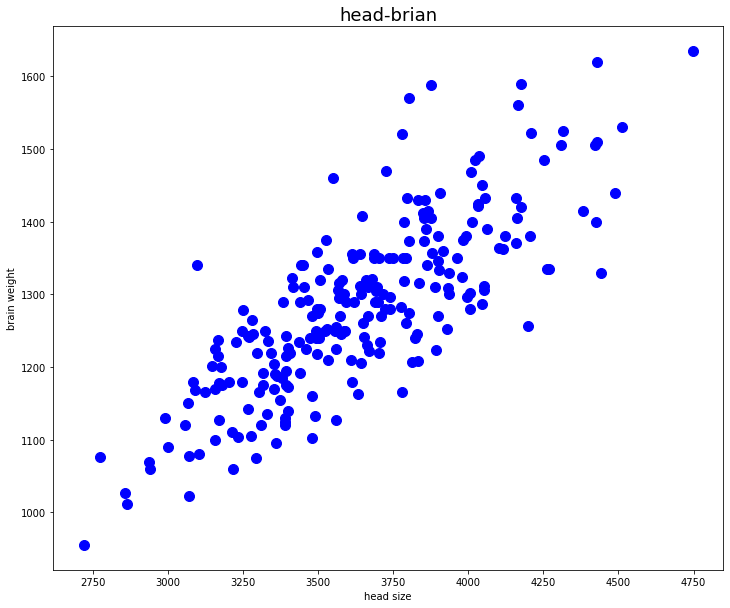

In [ ]:
plt.figure(figsize=(12,10))

plt.title('head-brian', size = 18)

plt.scatter(head_brain_data[head_size], head_brain_data[brain_weight], s=100, color = 'blue')
plt.ylabel("brain weight")
plt.xlabel("head size")
plt.show()

In [ ]:
# note: it is linear in nature

# outliers can be clearly observed 

# **EE**

In [ ]:
from sklearn.covariance import EllipticEnvelope

# all data comes from gaussian

ee = EllipticEnvelope(support_fraction = None, contamination = 0.1) # contamination param gives an idea of how much portioon of the data has anomalies.

In [ ]:
y_pred = ee.fit_predict(x)

y_pred

array([-1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1

In [ ]:
n_outliers = (y_pred == -1).sum()
n_outliers

24

In [ ]:
xx, yy = np.meshgrid(np.linspace(x[head_size].min(), x[brain_weight].max(), 500), np.linspace(x[brain_weight].min(),x[brain_weight].max(), 500))
print('xx=', xx.ravel()) # converts to a 1d array
print('yy =', yy.ravel())

xx= [2720.         2724.06212425 2728.1242485  ... 4738.8757515  4742.93787575
 4747.        ]
yy = [ 955.  955.  955. ... 1635. 1635. 1635.]


In [ ]:
z = ee.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)
z

array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]])

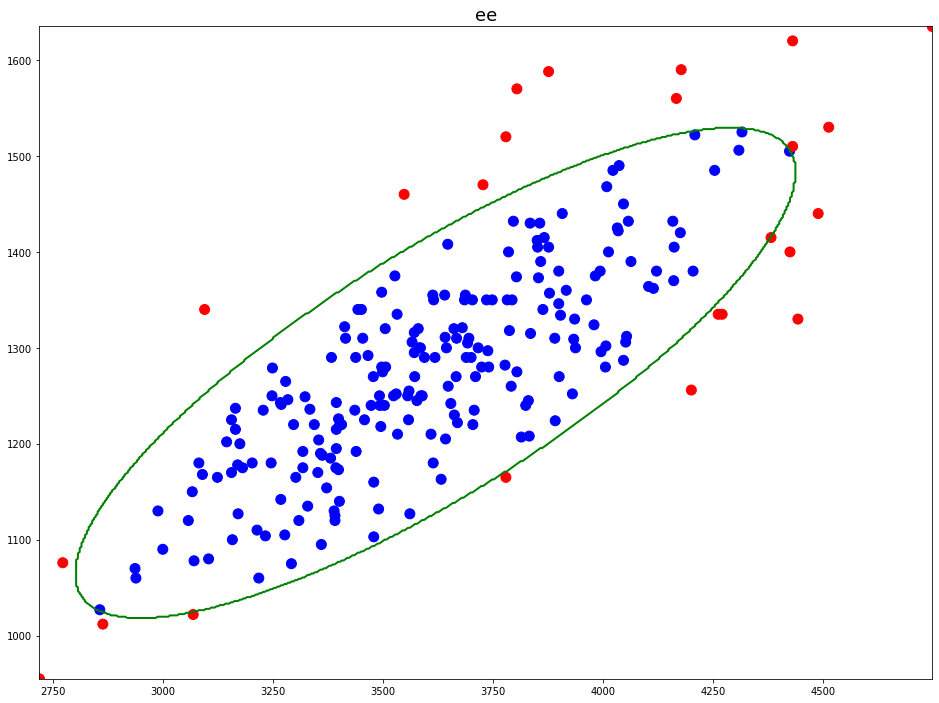

In [ ]:
colorss = np.array(['r','b'])

plt.figure(figsize=(16,12))

plt.title('ee', size = 18)

plt.scatter(x[head_size], x[brain_weight], s=100, color = colorss[(y_pred + 1) // 2])

plt.contour(xx ,yy , z ,levels=[0], linewidths=2, colors='green')

plt.show()

# Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest

isf = IsolationForest(behaviour = 'new', contamination = 0.1) # proportion of outliers, behaviour=new uses threshold of zero

y_pred = isf.fit_predict(x)
y_pred

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


array([-1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1

In [ ]:
xx, yy = np.meshgrid(np.linspace(x[head_size].min(), x[brain_weight].max(), 500), np.linspace(x[brain_weight].min(),x[brain_weight].max(), 500))
print('xx=', xx.ravel()) # converts to a 1d array
print('yy =', yy.ravel())

z = isf.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

z



xx= [2720.         2717.8256513  2715.65130261 ... 1639.34869739 1637.1743487
 1635.        ]
yy = [ 955.  955.  955. ... 1635. 1635. 1635.]


array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: No contour levels were found within the data range.
  if __name__ == '__main__':


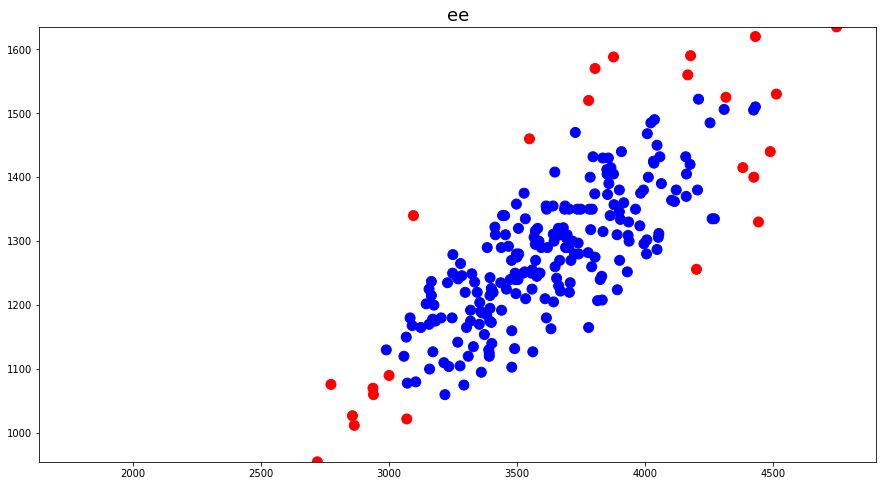

In [ ]:
colorss = np.array(['r','b'])

plt.figure(figsize=(15,8))

plt.title('isf', size = 18)

plt.scatter(x[head_size], x[brain_weight], s=100, color = colorss[(y_pred + 1) // 2])

plt.contour(xx ,yy , z ,levels=[0], linewidths=2, colors='black')

plt.show()